In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: [Monday, Mar 10, 11:59 pm](https://github.com/UBC-CS/cpsc330-2024W2?tab=readme-ov-file#deliverable-due-dates-tentative)**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W2/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W2/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

### Final Test $R^2$ (LGBM): 0.6956
</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
# Hide future warnings 
import os
os.environ["PYTHONWARNINGS"] = "ignore::FutureWarning"
import warnings
warnings.simplefilter("ignore", FutureWarning)

In [3]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shap 

from sklearn import datasets
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
    KFold
)
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm.sklearn import LGBMRegressor
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SequentialFeatureSelector


<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

### Introduction

<b>Chosen Option: (2) AirBNB Regression Problem</b>
    
The data contains different features which seem relevant for predicting popularity, i.e. room type, neighbourhood group, price, and other descriptive attributes specific to the listing. There are also features which we will likely exclude due to contextual irrelevance. For example, we might omit host_id and host_name under the assumption that the host's identity does not impact listing popularity (compared to performance measures such as the host's number of listings (included in the data) or star rating (not included in the data). There are also redundant geographical variables such as latitude, longitude, neighbourhood, and neighbourhood group. Another important observation is the presence of missing values in the target variable. In later sections, we will be considering which features to select and which imputation strategies to implement. 

<b>Overall, the AirBNB  data set is a useful resource for exploring what drives listing popularity on the platform. By examining a variety of features, AirBNB and hosts alike may better understand market dynamics and optimize their rental strategies. </b>


In [4]:
airbnb_data = pd.read_csv("data/AB_NYC_2019.csv")

print(airbnb_data.info())
airbnb_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [5]:
airbnb_train, airbnb_test = train_test_split(airbnb_data, train_size = 0.7, random_state = 123)
airbnb_train.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
36150,28736148,Cozy 1 Bedroom Apt in Hamilton Heights,43431867,Tommy,Manhattan,Washington Heights,40.83256,-73.94440,Entire home/apt,96,4,0,NaN,NaN,1,17
45223,34613254,Amazing One Bedroom at the Time Square Area/72B,48146336,Irina,Manhattan,Hell's Kitchen,40.76134,-73.99299,Entire home/apt,150,30,0,NaN,NaN,20,332
14316,11144496,"New Spacious Master, Williamsburg",48819868,Nick,Brooklyn,Williamsburg,40.71119,-73.95097,Private room,200,1,0,NaN,NaN,1,0
1691,766814,Adorable Midtown West Studio!,4022922,Caitlin,Manhattan,Hell's Kitchen,40.75900,-73.99530,Entire home/apt,95,1,0,NaN,NaN,1,0
20195,16162621,NEW! Exceptional 2BR/1BA Williamsburg Oasis,104781467,Russell,Brooklyn,Williamsburg,40.71306,-73.94856,Entire home/apt,199,3,1,2016-12-11,0.03,1,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

First, we must investigate whether the missing values in our target are Missing Not At Random (MNAR)—in other words, whether they indicate a systematic absence of reviews rather than a random data collection error. In our dataset, we inspect the relevant columns to see if listings with missing values in reviews_per_month also have 0 in number_of_reviews and no date in last_review:

In [6]:
missing_rpm = airbnb_train[['number_of_reviews','last_review','reviews_per_month']] \
[airbnb_train['reviews_per_month'].isnull()]

missing_rpm

,number_of_reviews,last_review,reviews_per_month
36150,0,NaN,NaN
45223,0,NaN,NaN
14316,0,NaN,NaN
1691,0,NaN,NaN
32025,0,NaN,NaN
...,...,...,...
48892,0,NaN,NaN
6484,0,NaN,NaN
26626,0,NaN,NaN
33710,0,NaN,NaN


As we can see, the 6990 examples where reviews_per_month is missing correspond to listings with 0 number_of_reviews and no recorded last_review date. This strongly suggests that these missing values are not random; rather, they represent listings that have never received a review. <b>Hence, imputing the target with 0 is a plausible solution</b> because it directly reflects that a listing with no reviews should have 0 reviews per month. This approach ensures consistency and prevents the model from misinterpreting missing data as unknown, thereby allowing it to learn the true pattern of popularity across listings.

In [7]:
# Imputing NaN values for the target to reflect a value of 0 for reviews_per_month (0 total reviews)
airbnb_train['reviews_per_month'] = airbnb_train['reviews_per_month'].fillna(0)
airbnb_test['reviews_per_month'] = airbnb_test['reviews_per_month'].fillna(0)

airbnb_train[['number_of_reviews','last_review','reviews_per_month']].head()

,number_of_reviews,last_review,reviews_per_month
36150,0,NaN,0.00
45223,0,NaN,0.00
14316,0,NaN,0.00
1691,0,NaN,0.00
20195,1,2016-12-11,0.03


### Exploring Categorical Variables

Below, we aim to explore potential relationships in the categorical variables by aggregating against neighbourhood group. This gives us insight into how listing characteristics differ across regions. For example, the table reveals that Manhattan has the highest average price with the lowest reviews per month, while Queens shows a lower average price but the highest reviews per month. In the accompanying bar chart, we compare mean reviews per month across neighbourhood groups, with bars grouped by room type. We can see that entire home/apt listings often receive slightly more monthly reviews than private or shared rooms, although this trend is flipped for Manhattan. 

<b>This demonstrates that both location and room type might influence listing popularity, guiding our approach to feature selection and model development.</b>

In [8]:
# Summary across neighbourhood groups
neighbourhood_group_summary = airbnb_train.drop(columns=['id','host_id','latitude','longitude']) \
.groupby('neighbourhood_group') \
.mean(numeric_only=True). \
sort_values(by='reviews_per_month')
neighbourhood_group_summary.insert(0, 'count', airbnb_train.groupby('neighbourhood_group').size())

neighbourhood_group_summary

,count,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,
Manhattan,15176,194.897733,8.705720,21.003295,0.976574,12.594557,112.143714
Brooklyn,14050,124.216726,6.099004,24.082989,1.044762,2.275445,99.655445
Bronx,771,87.551232,4.542153,25.084306,1.461543,2.320363,167.627756
Staten Island,255,125.729412,5.650980,29.807843,1.523451,2.325490,198.647059
Queens,3974,96.536236,5.052843,28.063412,1.583694,3.912431,143.273025


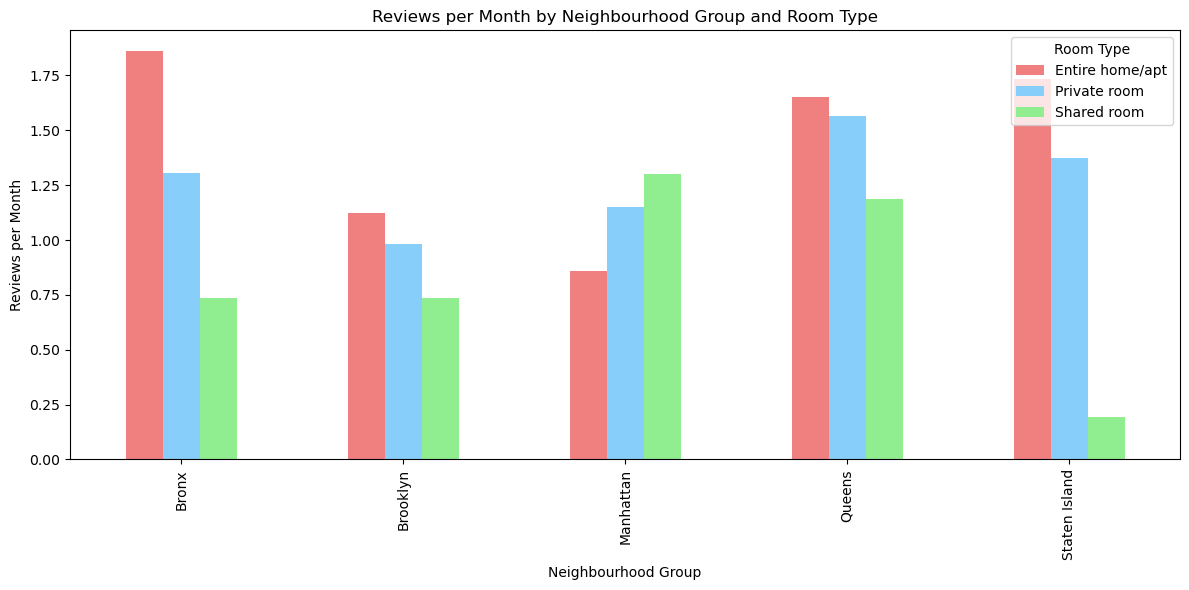

In [9]:

# Create a pivot table of mean number_of_reviews by neighbourhood_group and room_type
pivot_data = (
    airbnb_train
    .groupby(['neighbourhood_group', 'room_type'])['reviews_per_month']
    .mean()
    .unstack()  # Convert the 'room_type' levels into columns
)

# Plot as a side-by-side bar chart
pivot_data.plot(kind='bar', figsize=(12, 6), color=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.xlabel('Neighbourhood Group')
plt.ylabel('Reviews per Month')
plt.title('Reviews per Month by Neighbourhood Group and Room Type')
plt.legend(title='Room Type', loc='upper right')
plt.tight_layout()
plt.show()

### Exploring Numerical Variables

From the summary statistics, we see a wide range for both price and minimum_nights, suggesting the presence of outliers that skew these distributions. Meanwhile, number_of_reviews varies greatly, from 0 to 629, and reviews_per_month peaks at about 58.5—indicating that although some listings receive a high volume of monthly reviews, many have fewer or none at all. In the accompanying scatter plots, there is no obvious linear relationship with reviews_per_month, with most data points clustering near the lower end of each x-axis. This visual absence of correlation is confirmed by the heatmap: reviews_per_month exhibits only weak or moderate correlations with other numeric features (aside from number_of_reviews, which is expected). This finding implies that straightforward linear modeling on these variables might be insufficient to capture the complexity of listing popularity—some degree of feature engineering may be required.

<b> The relatively weak correlation with reviews_per_month hints that either other variables (categorical or transformed features) might be more predictive, or that a non-linear approach (like tree-based models) could better capture the interactions in our data.</b>

In [10]:
# Describe Summary
airbnb_data.drop(columns=['id','host_id','latitude','longitude']).describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


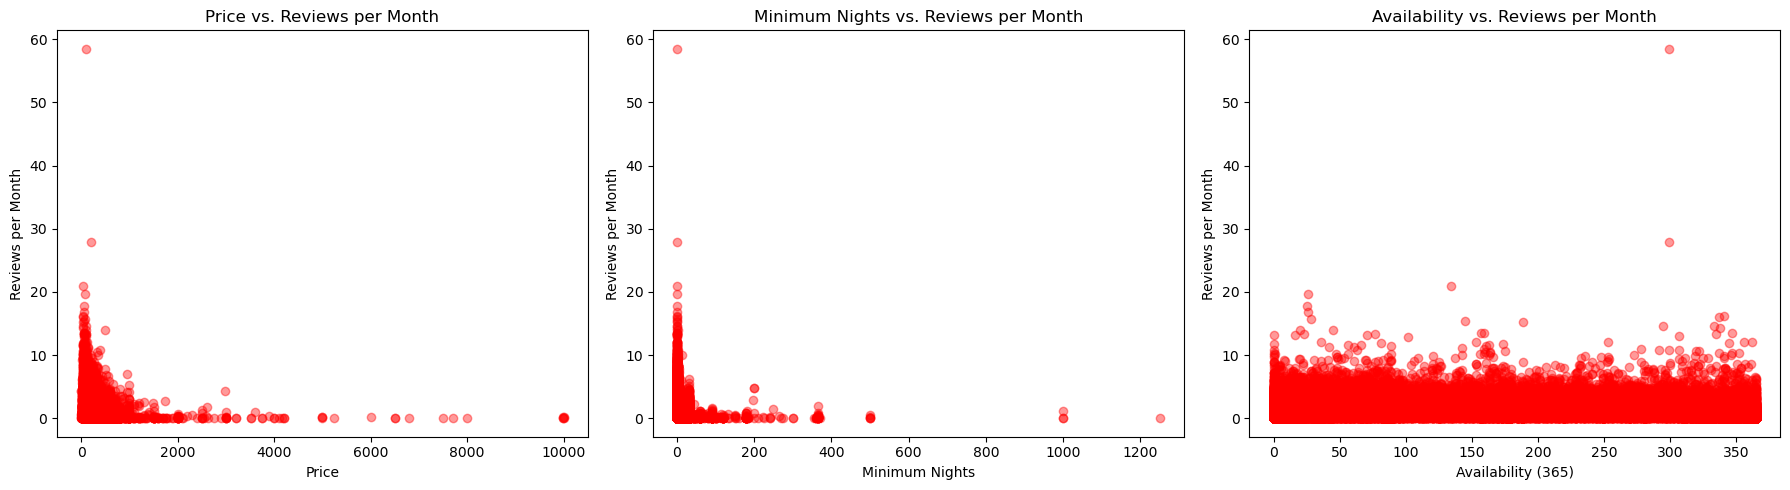

In [11]:
# Scatter plots for availability, minimum nights, and price vs. reviews per month
variables = [
    ('price', 'Price', 'Price vs. Reviews per Month'),
    ('minimum_nights', 'Minimum Nights', 'Minimum Nights vs. Reviews per Month'),
    ('availability_365', 'Availability (365)', 'Availability vs. Reviews per Month')
]

fig, axes = plt.subplots(1, len(variables), figsize=(18, 5))

for ax, (col, xlabel, title) in zip(axes, variables):
    ax.scatter(airbnb_train[col], airbnb_train['reviews_per_month'], alpha=0.4, color='red')
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Reviews per Month')
    ax.set_title(title)

plt.tight_layout()
plt.show()

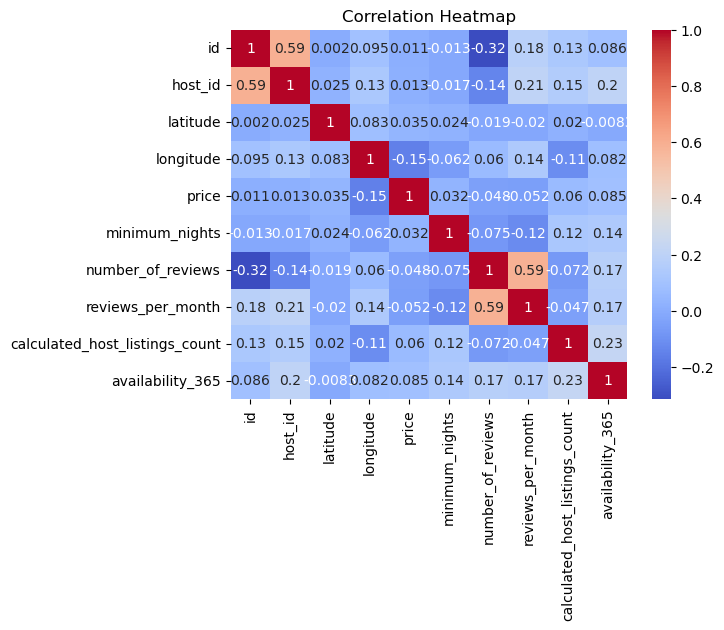

In [12]:
# Correlation Heatmap
corr = airbnb_train.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Metrics for assessment: $R^2$

<b>We will be using the coefficient of determination, $R^2$, as our primary metric for evaluating model performance. </b>

$R^2$ measures the proportion of variance in the target variable that is explained by the model, making it intuitive for comparing how well different models capture the underlying patterns in the data. A higher $R^2$ value (closer to 1) indicates that the model accounts for more of the variability in the target, while an $R^2$ near 0 means it offers little improvement over simply predicting the mean. This clarity in interpretation (variation in outcome captured by model) makes $R^2$ a standard choice for regression tasks, especially when communicating results to non-technical stakeholders.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

<b>We introduce several new features designed to capture important listing characteristics and address skew in the data.</b>

First, we create a min_payment feature by multiplying each listing’s price by its minimum_nights, reflecting the minimum total cost a guest would pay. We also derive a recency measure (days since last review) by comparing last_review to a fixed reference date of December 31, 2019; missing values, which likely indicate idle listings, are imputed with the 90th percentile to avoid inflating the distribution with maximum values. Upon experimenting with bin values for the discretizer, we found that these values (10 bins for price and 3 bins for minimum nights) best address the scale and skew of the price/minimum nights distributions. The new price_binned and min_nights_binned features can help models, particularly linear or tree-based methods, capture non-linear relationships more effectively. By inspecting these engineered columns, we can confirm that they sensibly represent ranges of values, balancing outliers and making the data more appropriate for predictive modeling.

In [13]:
# 1. Minimum Payment
# Interaction feature: minimum payment representing daily price * minimum nights
airbnb_train['min_payment'] = airbnb_train['price'] * airbnb_train['minimum_nights']

# 2. Recency
# Derived feature: Recency (number of days since the last review, using 2019-12-31 as reference
airbnb_train['last_review'] = pd.to_datetime(airbnb_train['last_review'], 
                                             errors='coerce')
reference_date = pd.Timestamp('2019-12-31')
airbnb_train['recency'] = (reference_date - airbnb_train['last_review']).dt.days
# Imputing with 90th percentile to reflect idle listings, while not overly skewing the data (if max is used)
airbnb_train['recency'] = airbnb_train['recency'].fillna(airbnb_train['recency'].quantile(0.90)) 

# 3. Price and Minimum Nights Bins
# Price Discretization: 10 bins 
price_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
airbnb_train['price_binned'] = price_discretizer.fit_transform(airbnb_train[['price']]).astype(int)
# Minimum Nights Discretization: 3 bins 
min_nights_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
airbnb_train['min_nights_binned'] = min_nights_discretizer.fit_transform(airbnb_train[['minimum_nights']]).astype(int)


# Inspect engineered features
print(airbnb_train['price_binned'].unique())
print(airbnb_train['min_nights_binned'].unique())
airbnb_train[['min_payment','price_binned','min_nights_binned','recency']]


[4 6 8 9 0 3 2 1 5 7]
[2 0 1]


,min_payment,price_binned,min_nights_binned,recency
36150,384,4,2,1174.0
45223,4500,6,2,1174.0
14316,200,8,0,1174.0
1691,95,4,0,1174.0
20195,597,8,1,1115.0
...,...,...,...,...
7763,2850,4,2,213.0
15377,278,6,1,184.0
17730,750,8,1,364.0
28030,80,0,1,210.0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

<b>The code below constructs a comprehensive preprocessing pipeline tailored to our AirBNB dataset.</b>

First, the numeric features—including price, minimum nights, number of reviews, calculated host listings count, availability, min_payment, and recency—are scaled using standard scaling, ensuring they are centered and have unit variance. Categorical variables, such as neighbourhood group and room type, are transformed via one-hot encoding to convert them into binary indicators, while two ordinal features—price_binned and min_nights_binned—are discretized using predefined bin ranges and encoded with an ordinal encoder. No imputation is required as we are dropping the only feature with null values: last_review. Lastly, non-predictive, redundant, or contextually irrelevant columns (like id, host_id, host_name, latitude & longitude, neighbourhood, etc.) are explicitly dropped. The entire transformation is combined into a single ColumnTransformer (preprocessor).

In [14]:
# Numeric features: Measurable continuous or count variables that can be used directly (often after scaling).
numeric_feats = [
    'price',                        
    'minimum_nights',               
    'number_of_reviews',            
    'calculated_host_listings_count', 
    'availability_365',             
    'min_payment',                  # Derived: price multiplied by minimum nights (minimum cost)
    'recency'                       # Derived: days elapsed since the last review
]

# Categorical features: Nominal variables representing group membership without ordering.
categorical_feats = [
    'neighbourhood_group',          
    'room_type'                     
]

# Ordinal features: Discretized numeric variables that retain a natural order.
ordinal_feats = [
    'price_binned',                 # Price grouped into ordered categories via quantile binning
    'min_nights_binned'             # Minimum nights grouped into ordered categories via quantile binning
]

# Drop features: Variables to exclude from modeling due to non-predictive nature or contextual reasons.
drop_feats = [
    'id',                           
    'name',                        
    'host_id',                     
    'host_name',                    
    'last_review',                  
    'latitude',                     # Location features: using neighbourhood_group for simplicity/generalizability
    'longitude',                    
    'neighbourhood',
]

# Target: reviews per month
target = "reviews_per_month"

In [15]:
# Create train split
X_train = airbnb_train.drop(columns=target)
y_train = airbnb_train[target]

In [16]:
# Defining ordinality of min_nights_binned and price_binned
price_bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
min_nights_bins = [0, 1, 2]

# Pipeline for numeric values: standard scaling, no NaNs so no need for imputing
num_pipeline = make_pipeline(
    StandardScaler()
)

# Pipeline for categorical values: one hot encoder, no NaNs
cat_pipeline = make_pipeline(
    OneHotEncoder(handle_unknown='ignore', categories='auto', sparse_output=False)
)

price_bin_transformer = OrdinalEncoder(categories=[price_bins], dtype=int)
min_nights_bin_transformer = OrdinalEncoder(categories=[min_nights_bins], dtype=int)

# Create a column transformer 
preprocessor = make_column_transformer(
    (num_pipeline, numeric_feats),
    (cat_pipeline, categorical_feats),
    (price_bin_transformer, [ordinal_feats[0]]),
    (min_nights_bin_transformer, [ordinal_feats[1]]),
    ("drop", drop_feats),
    remainder="passthrough"
)


### Side Note: Feature Engineering & Preprocessing Design Decisions

Naturally, our team was skeptical about combining raw and engineered features due to potential redundancy and multicollinearity. We also questioned whether features like price_binned or min_payment would add meaningful signal. Hence, we first tried a model pipeline using only the original (parent) features and omitting any newly engineered variables.

#### Experiment 1: Full Model without Engineered Features

<img src="img/no-engineered-features.png" alt="Full Model with No Engineered Features" width="600">

As shown in the first table above, this approach yielded an $R^2$ of about 0.37 for Ridge, with the other non-linear models still scoring better than the baseline. Overall, the model explained only a modest portion of the variance in reviews_per_month, prompting us to investigate whether engineered features might capture important non-linearities or interactions.

Next, we removed the parent features (such as raw price and minimum_nights) and retained only the engineered ones (e.g., min_payment, price_binned, min_nights_binned). The goal was to see if these derived variables alone could outperform the raw features by themselves.

#### Experiment 2: Model with Engineered Features, without Parent Features

<img src="img/without-parent-features.png" alt="Full Model with Engineered Features, without Parent Features" width="600">

In the second table above, we observed an $R^2$ improvement—Ridge, for instance, increased to around 0.47—indicating that these engineered variables indeed helped capture relationships more effectively. Likely, transformations like binning and multiplying price by minimum nights simplified or highlighted patterns that a straightforward linear model (like Ridge) could exploit. We also observe performance improvements across the non-linear models.

#### Experiment 3: Full Model with Engineered Features and Parent Features

<img src="img/full-model-with-engineered-features.png" alt="Full Model with Engineered Features" width="600">

Finally, we combined both the raw and the engineered features, despite concerns about redundancy. As seen in the third table above, this configuration yielded the highest $R^2$—Ridge reached close to 0.5, and the non-linear models also saw gains (although minor). The additional features appear to provide complementary information: while binning and interaction terms highlight certain patterns, the original numeric columns preserve finer-grained details. This synergy helped the models capture more variance in reviews_per_month, hence our decision to use this iteration in our final pipeline.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

<b>We use the mean_std_cross_val_scores() shown in class to implement scikit-learn's baseline regression model (DummyRegressor).</b>

As expected, we arrive at training and test scores of 0 for $R^2$ because the DummyRegressor (with strategy="mean") predicts the mean value for all examples. With strategy="median", we arrive at a negative $R^2$, meaning the baseline model performs worse than simply predicting the mean.

In [17]:
# Taken from Lecture 5: preprocessing and pipelines

results_dict = {}  # dictionary to store our results for different models

In [18]:
# Taken from Lecture 5: preprocessing and pipelines

def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [19]:
# Taken from Lecture 5: preprocessing and pipelines

# We use mean here to reflect the baseline. Using median results in a negative R^2.
dummy = DummyRegressor(strategy="mean") 
dummy_pipe = make_pipeline(preprocessor, dummy)
results_dict = {}
results_dict["dummy"] = mean_std_cross_val_scores(
    dummy_pipe, X_train, y_train, return_train_score=True
)
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
dummy,0.057 (+/- 0.007),0.016 (+/- 0.002),-0.000 (+/- 0.000),0.000 (+/- 0.000)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

<b>We start with a simple linear model using Ridge regression's default hyperparameters to predict reviews_per_month with cross-validation.</b>

After the below hyperparameter tuning, we use an alpha of 100, although this results in only a small improvement.

In [20]:
linear_model_pipe = make_pipeline(preprocessor, 
                                  # Found an optimal alpha of 100 from tuning below
                                  Ridge(alpha=100)) 
scores = cross_validate(linear_model_pipe, X_train, y_train, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.067205,0.016667,0.516248,0.490678
1,0.066339,0.016872,0.507756,0.492815
2,0.060204,0.015036,0.425218,0.516004
3,0.060832,0.014956,0.524338,0.489174
4,0.064078,0.015106,0.513973,0.491375


Next, we carry out hyperparameter tuning to explore different values of the complexity hyperparameter (alpha). The table below shows us that an alpha of 100 yields the best cross-validation scores. Hence, we re-assess our model with the optimized complexity hyperparameter.

In [21]:
# Taken from Lecture 7: Linear Models

scores_dict = {
    "alpha": 10.0 ** np.arange(-3, 6, 1),
    "mean_train_scores": list(),
    "mean_cv_scores": list(),
}
for alpha in scores_dict["alpha"]:
    pipe_ridge = make_pipeline(preprocessor, Ridge(alpha=alpha))
    scores = cross_validate(pipe_ridge, X_train, y_train, return_train_score=True)
    scores_dict["mean_train_scores"].append(scores["train_score"].mean())
    scores_dict["mean_cv_scores"].append(scores["test_score"].mean())

results_df = pd.DataFrame(scores_dict)
results_df

,alpha,mean_train_scores,mean_cv_scores
0,0.001,0.496018,0.497498
1,0.010,0.496018,0.497498
2,0.100,0.496018,0.497498
3,1.000,0.496018,0.497499
4,10.000,0.496017,0.497500
5,100.000,0.496009,0.497507
6,1000.000,0.495454,0.497011
7,10000.000,0.471145,0.472722
8,100000.000,0.239822,0.240643


Changing our alpha from the default value of 1 to 100 resulted in a minimal cross-validation score improvement of 0.1% (0.497 -> 0.498). It is likely that the features are already well-conditioned (i.e., little multicollinearity or instability in the design matrix) so changes in regularization don’t significantly alter the coefficient estimates. Still, we will retain alpha=100 for future analyses.

In [22]:
results_dict["ridge"] = mean_std_cross_val_scores(
    linear_model_pipe, X_train, y_train, return_train_score=True
)
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
dummy,0.057 (+/- 0.007),0.016 (+/- 0.002),-0.000 (+/- 0.000),0.000 (+/- 0.000)
ridge,0.062 (+/- 0.006),0.015 (+/- 0.001),0.498 (+/- 0.041),0.496 (+/- 0.011)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

<b>We will now be implementing 3 non-linear models: random forest, decision tree, and light gradient boosting machine (LGBM).</b>

First, we create our non-linear model pipelines by integrating our preprocessor with the estimators (under their default hyperparameter values and with random_state=123 for reproducibility).

In [23]:
# Trying out 3 non-linear models with the default hyperparameter values 

# Create regression pipelines
random_forest_regressor = make_pipeline(preprocessor, 
                                        RandomForestRegressor(random_state=123))
decision_tree_regressor = make_pipeline(preprocessor, 
                                        DecisionTreeRegressor(random_state=123)) 
lgbm_regressor = make_pipeline(preprocessor, 
                               LGBMRegressor(random_state=123, verbose=-1))


We then loop through each pipeline and obtain the models' training and mean cross-validation scores, along with their fit and score times.

In [24]:
# Set up a list of models for cross-validation
models = [
    {"name": "random_forest_regressor", 
     "pipe": random_forest_regressor},
    {"name": "decision_tree_regressor", 
     "pipe": decision_tree_regressor},
    {"name": "lgbm_regressor", 
     "pipe": lgbm_regressor}
]

# Evaluate each model using cross-validation
for model in models:
    results_dict[model["name"]] = mean_std_cross_val_scores(
        model["pipe"], X_train, y_train, cv=5, return_train_score=True
    )

The resulting data frame shows us some interesting patterns in model behavior. The random forest regressor, while obtaining a higher test score of approximately 0.67, requires a significantly longer training time and produces an exceptionally high training score, suggesting potential overfitting by capturing too many details in the training data. The decision tree regressor clearly overfits, with a test score around 0.4 and a perfect training score of 1.0. Meanwhile, the LGBM regressor strikes a better balance between the training and test scores, indicating an ability to capture complex patterns without overfitting as severely as the decision tree or random forest (while also being more computationally efficient). 

<b>These suggest that while tree-based models can offer improved predictive performance, careful attention to overfitting and training efficiency is critical—making the LGBM model a particularly promising choice for this task.</b>

In [25]:
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
dummy,0.057 (+/- 0.007),0.016 (+/- 0.002),-0.000 (+/- 0.000),0.000 (+/- 0.000)
ridge,0.062 (+/- 0.006),0.015 (+/- 0.001),0.498 (+/- 0.041),0.496 (+/- 0.011)
random_forest_regressor,16.576 (+/- 0.076),0.187 (+/- 0.008),0.669 (+/- 0.027),0.953 (+/- 0.001)
decision_tree_regressor,0.298 (+/- 0.003),0.019 (+/- 0.003),0.401 (+/- 0.011),1.000 (+/- 0.000)
lgbm_regressor,0.185 (+/- 0.018),0.024 (+/- 0.002),0.684 (+/- 0.031),0.773 (+/- 0.004)


<b>In the following sections, we will be optimizing the decision tree and lgbm models.</b>

By focusing on these models, we can address overfitting and improve performance through optimized features and hyperparameters. While we can likely improve the random forest model, we will disregard it due to its significantly long fitting time (which will get exponentially longer as we use the search methods below).

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

<b>Now, we'll be attempting feature selection on the decision tree and lgbm models, using Recursive Feature Elimination with Cross-Validation (RFECV).</b>

In [26]:
# Necessary variables for feature selection and hyperparameter optimization
preprocessor.fit(X_train)
transformed_feature_names = preprocessor.get_feature_names_out(X_train.columns)
model_dict = {
    "decision_tree_regressor": DecisionTreeRegressor(random_state=123),
    "lgbm_regressor": LGBMRegressor(random_state=123, verbose=-1)
}
cv = KFold(n_splits=5, shuffle=True, random_state=123)

In [27]:
# Conducting RFECV 
rfecv_results = {}
rfecv_model_pipelines = {}

for model_name, estimator in model_dict.items():
    # Create RFECV object
    rfecv = RFECV(
        estimator=estimator,
        step=1,
        cv=cv,
        n_jobs=-1
    )

    # Integrate into pipeline
    pipe = make_pipeline(preprocessor, rfecv, estimator)
    pipe.fit(X_train, y_train)

    # Store the pipeline in a dictionary
    rfecv_model_pipelines["rfecv_" + model_name] = pipe

    # Map results to a df
    rfecv_results[model_name] = pd.DataFrame({
        "Features": transformed_feature_names,
        "Rankings": rfecv.ranking_
    }).sort_values(by="Rankings")

# Results
for model_name, df in rfecv_results.items():
    print(f"{model_name} results:")
    print(df, "\n")
    

decision_tree_regressor results:
                                         Features  Rankings
6                             pipeline-1__recency         1
2                   pipeline-1__number_of_reviews         2
5                         pipeline-1__min_payment         3
4                    pipeline-1__availability_365         4
16            ordinalencoder-2__min_nights_binned         5
0                               pipeline-1__price         6
3      pipeline-1__calculated_host_listings_count         7
15                 ordinalencoder-1__price_binned         8
10         pipeline-2__neighbourhood_group_Queens         9
1                      pipeline-1__minimum_nights        10
8        pipeline-2__neighbourhood_group_Brooklyn        11
9       pipeline-2__neighbourhood_group_Manhattan        12
13             pipeline-2__room_type_Private room        13
12          pipeline-2__room_type_Entire home/apt        14
14              pipeline-2__room_type_Shared room        15
7      

Above, we can observe RFECV's selected features as well as their associated rankings (which interestingly enough, include some of our engineered features). The results of using RFECV for feature selection show minimal improvement however, with a 9% increase in CV scores for the decision tree and no improvement for the LGBM regressor.

<b>Hence, we will be omitting this automated feature selection in future pipelines.</b>

In [28]:
# Results
for model_name, pipe in rfecv_model_pipelines.items():
    results_dict[model_name] = mean_std_cross_val_scores(
        pipe, X_train, y_train, cv=5, return_train_score=True
    )
results_df = pd.DataFrame(results_dict).T
results_df


,fit_time,score_time,test_score,train_score
dummy,0.057 (+/- 0.007),0.016 (+/- 0.002),-0.000 (+/- 0.000),0.000 (+/- 0.000)
ridge,0.062 (+/- 0.006),0.015 (+/- 0.001),0.498 (+/- 0.041),0.496 (+/- 0.011)
random_forest_regressor,16.576 (+/- 0.076),0.187 (+/- 0.008),0.669 (+/- 0.027),0.953 (+/- 0.001)
decision_tree_regressor,0.298 (+/- 0.003),0.019 (+/- 0.003),0.401 (+/- 0.011),1.000 (+/- 0.000)
lgbm_regressor,0.185 (+/- 0.018),0.024 (+/- 0.002),0.684 (+/- 0.031),0.773 (+/- 0.004)
rfecv_decision_tree_regressor,7.325 (+/- 1.122),0.018 (+/- 0.001),0.490 (+/- 0.030),0.498 (+/- 0.008)
rfecv_lgbm_regressor,31.569 (+/- 2.640),0.026 (+/- 0.001),0.684 (+/- 0.031),0.773 (+/- 0.005)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

<b>In this section, we will configure our hyperparameters to improve model performance by using RandomizedSearchCV.</b>

We are setting a broad search range across multiple hyperparameters, as using RandomizedSearchCV allows us to try more complex iterations without sacrificing efficiency—a much more efficient, yet similarly effective search method as GridSearchCV. Because RandomizedSearchCV samples a fixed number of hyperparameter combinations rather than exhaustively testing every possible combination, it significantly reduces computational time while still providing a robust exploration of the hyperparameter space, making it ideal when the parameter grid is large.

In [29]:
# Setting the parameter grids to test SearchCV on
param_grids = {
    "decision_tree_regressor": {
        "decisiontreeregressor__max_depth": [None, 5, 7, 10, 15, 20],
        "decisiontreeregressor__min_samples_leaf": [1, 2, 3, 4, 5, 7, 10],
        "decisiontreeregressor__min_samples_split": [2, 5, 7, 10, 15],
        "decisiontreeregressor__criterion": ["squared_error", "absolute_error", "friedman_mse"]
},
    "lgbm_regressor": {
        "lgbmregressor__n_estimators": [50, 100, 200, 300, 500, 800, 1000],
        "lgbmregressor__learning_rate": [0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 0.25],
        "lgbmregressor__max_depth": [None, 5, 8, 10, 12, 15, 20],
        "lgbmregressor__num_leaves": [20, 28, 31, 35, 40, 50],
        "lgbmregressor__min_child_samples": [5, 10, 15, 20, 30, 50]
}
}


We now implement the search method to obtain the optimized hyperparameter values. Then, we create a dictionary for the pipelines with the optimized inputs, as seen below.

In [30]:
# Optimizing Decision Tree and LGBM hyperparameters
for model_dict in [models[i] for i in range(1,3)]:
    model_name = model_dict["name"]
    pipe = model_dict["pipe"]
    rs = RandomizedSearchCV(
        pipe, 
        param_grids[model_name], 
        cv=cv, 
        scoring="r2",
        random_state=123,
        n_jobs=-1
    )
    rs.fit(X_train, y_train)
    
    print(f"Optimal Hyperparameters for {model_name}:", rs.best_params_)
    print(f"Best CV Score for {model_name}:", rs.best_score_)
    print("\n")
    

Optimal Hyperparameters for decision_tree_regressor: {'decisiontreeregressor__min_samples_split': 5, 'decisiontreeregressor__min_samples_leaf': 4, 'decisiontreeregressor__max_depth': 7, 'decisiontreeregressor__criterion': 'friedman_mse'}
Best CV Score for decision_tree_regressor: 0.636806240144986


Optimal Hyperparameters for lgbm_regressor: {'lgbmregressor__num_leaves': 20, 'lgbmregressor__n_estimators': 200, 'lgbmregressor__min_child_samples': 10, 'lgbmregressor__max_depth': None, 'lgbmregressor__learning_rate': 0.05}
Best CV Score for lgbm_regressor: 0.685733909385718




In [31]:
# Creating the pipeline and models with optimized hyperparameters
optimized_hyperparameter_models = [
    {"name": "decision_tree_regressor_optimized",
     "pipe": make_pipeline(preprocessor,
                           DecisionTreeRegressor(min_samples_split=5,
                                                min_samples_leaf=4,
                                                max_depth=7,
                                                criterion='friedman_mse'))
    },
    {"name": "lgbm_regressor_optimized",
     "pipe": make_pipeline(preprocessor,
                           LGBMRegressor(num_leaves=20,
                                        n_estimators=200,
                                        min_child_samples=10,
                                        max_depth=None,
                                        learning_rate=0.05))
    }
]

Conducting hyperparameter optimization with RandomizedSearchCV yielded significant improvements for the decision tree (23.5% increase in CV $R^2$ compared to the normal regressor) but minimal improvement for the LGBM (0.2% increase). This demonstrates that careful hyperparameter tuning can mitigate overfitting and enhance model performance. However, the minimal LGBM improvement indicates that the model may be near its optimal configuration given the current feature set and data quality, leaving only marginal gains from tuning hyperparameters. 

<b>Nonetheless, the optimized LGBM model emerges as our best balance of predictive accuracy and computational efficiency.</b>

In [32]:
# Results
for model in optimized_hyperparameter_models:
    results_dict[model["name"]] = mean_std_cross_val_scores(
        model["pipe"], X_train, y_train, cv=5, return_train_score=True
    )
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
dummy,0.057 (+/- 0.007),0.016 (+/- 0.002),-0.000 (+/- 0.000),0.000 (+/- 0.000)
ridge,0.062 (+/- 0.006),0.015 (+/- 0.001),0.498 (+/- 0.041),0.496 (+/- 0.011)
random_forest_regressor,16.576 (+/- 0.076),0.187 (+/- 0.008),0.669 (+/- 0.027),0.953 (+/- 0.001)
decision_tree_regressor,0.298 (+/- 0.003),0.019 (+/- 0.003),0.401 (+/- 0.011),1.000 (+/- 0.000)
lgbm_regressor,0.185 (+/- 0.018),0.024 (+/- 0.002),0.684 (+/- 0.031),0.773 (+/- 0.004)
rfecv_decision_tree_regressor,7.325 (+/- 1.122),0.018 (+/- 0.001),0.490 (+/- 0.030),0.498 (+/- 0.008)
rfecv_lgbm_regressor,31.569 (+/- 2.640),0.026 (+/- 0.001),0.684 (+/- 0.031),0.773 (+/- 0.005)
decision_tree_regressor_optimized,0.143 (+/- 0.010),0.016 (+/- 0.001),0.636 (+/- 0.028),0.682 (+/- 0.006)
lgbm_regressor_optimized,0.248 (+/- 0.009),0.032 (+/- 0.005),0.686 (+/- 0.029),0.760 (+/- 0.004)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

<b>We will now examine the shap summary plot of our best performing model, the LGBM regressor (optimized).</b>

In [33]:
lgbm_pipe_optimized = optimized_hyperparameter_models[1]["pipe"]
lgbm_pipe_optimized.fit(X_train, y_train)

# Taken from Lecture 13: Feature Importances
ohe_feature_names = (
    lgbm_pipe_optimized.named_steps["columntransformer"]
    .named_transformers_["pipeline-2"]
    .named_steps["onehotencoder"]
    .get_feature_names_out(categorical_feats)
    .tolist()
)
feature_names = (
    numeric_feats + ordinal_feats + ohe_feature_names
)
feature_names


['price',
 'minimum_nights',
 'number_of_reviews',
 'calculated_host_listings_count',
 'availability_365',
 'min_payment',
 'recency',
 'price_binned',
 'min_nights_binned',
 'neighbourhood_group_Bronx',
 'neighbourhood_group_Brooklyn',
 'neighbourhood_group_Manhattan',
 'neighbourhood_group_Queens',
 'neighbourhood_group_Staten Island',
 'room_type_Entire home/apt',
 'room_type_Private room',
 'room_type_Shared room']

In [34]:
X_train_enc = pd.DataFrame(
    data=preprocessor.transform(X_train),
    columns=feature_names,
    index=X_train.index,
)
X_train_enc.head()


,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,min_payment,recency,price_binned,min_nights_binned,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
36150,-0.234668,-0.143631,-0.521504,-0.185406,-0.726886,-0.089234,1.216412,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0
45223,-0.006459,1.062979,-0.521504,0.397589,1.670044,0.341446,1.216412,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,6.0,2.0
14316,0.204846,-0.282855,-0.521504,-0.185406,-0.856244,-0.108486,1.216412,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0
1691,-0.238895,-0.282855,-0.521504,-0.185406,-0.856244,-0.119473,1.216412,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0
20195,0.200620,-0.190039,-0.499068,-0.185406,-0.856244,-0.066946,1.091103,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,1.0


<b>The shap summary plot highlights which features most strongly influence the model’s predictions for reviews_per_month and how their values affect the outcome.</b>

Each dot on a row represents a single listing, and the position on the x-axis indicates how much that feature shifts the model output (i.e., more to the right increases the prediction, more to the left decreases it). The color gradient from blue (low feature value) to red (high feature value) shows which listings are being pushed up or down by that feature. 

At the top, recency (days since last review) emerges as the most impactful feature: blue points (lower recency) generally push predictions upward, whereas red points (higher recency) tend to lower them. This is aligned with expectations, as listings that are reviewed most recently generally indicate tenant activity (and consequently, popularity). Similarly, number of reviews and minimum nights are in line with expectations: higher total reviews and lower minimum nights increase monthly reviews (as people would prefer control over their length of stay). Interestingly, neighbourhood groups also show significant impact on feature predictions, validating our exploratory data analysis. The summary plot also reveals that both newly engineered variables (i.e., min_payment and min_nights_binned) and raw indicators (i.e., neighbourhood groups) play meaningful roles in predicting monthly reviews, though some have greater effects than others.

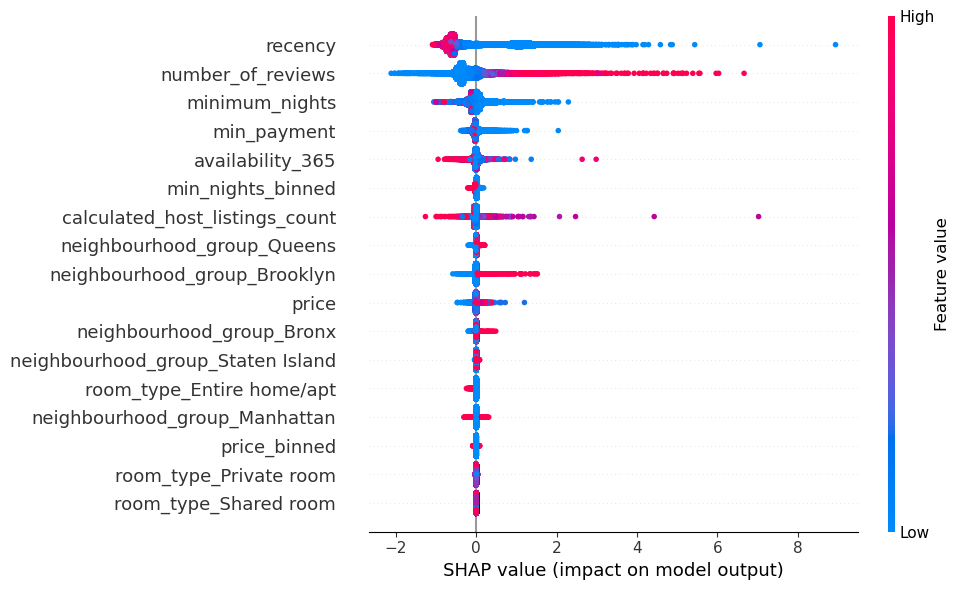

In [35]:
# Taken from Lecture 13: Feature Importances
lgbm_model_optimized = lgbm_pipe_optimized.named_steps["lgbmregressor"]
lgbm_model_optimized.fit(X_train_enc, y_train)

explainer = shap.TreeExplainer(lgbm_model_optimized) # define the shap explainer 
train_shap_values = explainer(X_train_enc) # train shap values

shap.summary_plot(train_shap_values, X_train_enc, plot_size=(10, 6))


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

We first have to apply our feature engineering to the test data to ensure it can be passed on to the optimized LGBM pipeline.

In [36]:
# Applying feature engineering to the test set
# 1. Minimum Payment
airbnb_test['min_payment'] = airbnb_test['price'] * airbnb_test['minimum_nights']

# 2. Recency
airbnb_test['last_review'] = pd.to_datetime(airbnb_test['last_review'], 
                                             errors='coerce')
reference_date = pd.Timestamp('2019-12-31')
airbnb_test['recency'] = (reference_date - airbnb_test['last_review']).dt.days
airbnb_test['recency'] = airbnb_test['recency'].fillna(airbnb_test['recency'].quantile(0.90)) 

# 3. Price and Minimum Nights Bins
price_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
airbnb_test['price_binned'] = price_discretizer.fit_transform(airbnb_test[['price']]).astype(int)
min_nights_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
airbnb_test['min_nights_binned'] = min_nights_discretizer.fit_transform(airbnb_test[['minimum_nights']]).astype(int)


In [37]:
# Create test split
X_test = airbnb_test.drop(columns=target)
y_test = airbnb_test[target]

In [38]:
y_pred = lgbm_pipe_optimized.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
test_r2

0.6956301217384856

<b>We observe a final test $R^2$ of 0.6956 for the optimized LGBM model.</b>

In [39]:
# Taken from Lecture 13: Feature Importances
shap.initjs()
ex1_idx = 20
ex2_idx = 69

X_test_enc = pd.DataFrame(
    data=preprocessor.transform(X_test),
    columns=feature_names,
    index=X_test.index,
)
test_shap_values = explainer(X_test_enc) # test shap values 

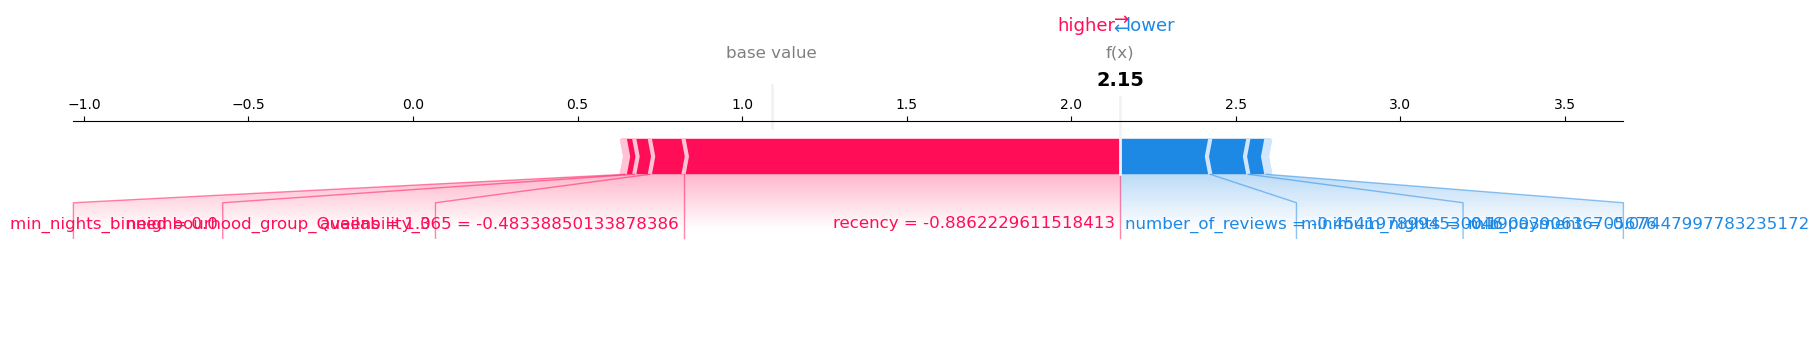

In [45]:
# Example 1: index 20
shap.force_plot(explainer.expected_value, test_shap_values.values[ex1_idx, :], X_test_enc.iloc[ex1_idx, :], matplotlib=True)

The individual prediction for index 20 (reviews_per_month = 2.15) is greatly influenced by recency, with the long red tail demonstrating that this feature pushed the prediction up to 2.15 from the base value of 1.09 (as demonstrated by the high magnitude of the coefficient: -0.8862). Other key predictors include number of reviews and yearly availability, which push the predicted value down and up, respectively.

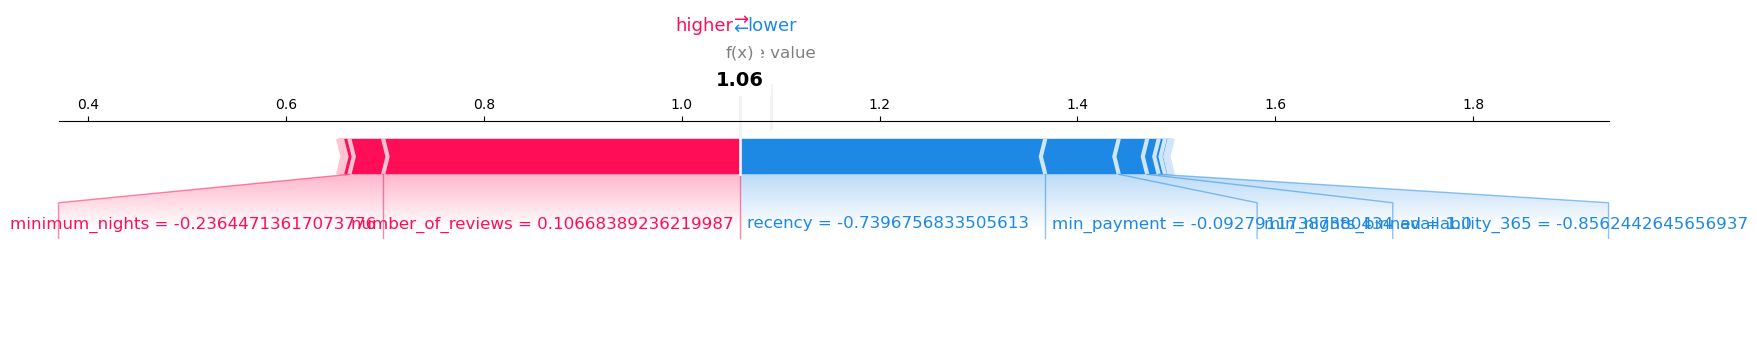

In [46]:
# Example 2: index 69
shap.force_plot(explainer.expected_value, test_shap_values.values[ex2_idx, :], X_test_enc.iloc[ex2_idx, :], matplotlib=True)

The individual prediction for index 69 (reviews_per_month = 1.06) is influenced by recency, with the long blue tail demonstrating that this feature pushed the prediction down to 1.06 from the base value of 1.09 (as shown by the high magnitude of the coefficient: -0.7397). Other key predictors include number of reviews (impacted this prediction at around the same magnitude of recency) and minimum nights.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

### Summary Table

| **Model**                   | **CV R² (mean ± std)** | **Key Hyperparameters**                                        | **Test R²** |
|---------------------------- | ----------------------- | -------------------------------------------------------------- | ----------- |
| **Dummy**                   | 0 ± 0           | N/A (predicts mean)                                    | N/A         |
| **Ridge**                   | 50% ± 4            | alpha=100                                                      | N/A       |
| **Random Forest Regressor** | 67% ± 3            | default (n_estimators=100), random_state=123                  | N/A       |
| **Decision Tree Regressor** | 64% ± 3            | max_depth=7, min_samples_split=5, min_samples_leaf=4, <br>criterion="friedman_mse" | N/A       |
| **LGBM Regressor**          | **69% ± 3**            | n_estimators=200, learning_rate=0.05, max_depth=None, <br>num_leaves=20, min_child_samples=10 | **70%**  |

### Concluding Remarks

In summary, our comprehensive analysis and model development has shown us valuable insights into the factors driving listing popularity. By systematically exploring and comparing raw features, engineered features, and a combination of both, we found that incorporating engineered variables—such as min_payment and recency—alongside the original data improved model performance. Our rigorous approach, which included feature selection using RFECV and hyperparameter optimization via RandomizedSearchCV, enabled us to develop robust pipelines that balanced model complexity and generalization. 

<b>The Light Gradient Boosting Machine (LGBM) Regressor emerged as the optimal model to deploy given the problem and dataset,</b> outperforming other models while managing computational efficiency. Although we encountered challenges like missing target values and potential redundancy among features, our iterative process allowed us to refine the preprocessing and modeling steps effectively. The analysis not only enhances our understanding of AirBNB listing dynamics but also provides actionable strategies for hosts and the platform to optimize rental performance—for example, incentivizing recency in reviews or decreasing the minimum nights stayed (as inferred from our feature importances). Finally, we have a decent model that can predict a future listing's popularity.

In [44]:
results_df

,fit_time,score_time,test_score,train_score
dummy,0.057 (+/- 0.007),0.016 (+/- 0.002),-0.000 (+/- 0.000),0.000 (+/- 0.000)
ridge,0.062 (+/- 0.006),0.015 (+/- 0.001),0.498 (+/- 0.041),0.496 (+/- 0.011)
random_forest_regressor,16.576 (+/- 0.076),0.187 (+/- 0.008),0.669 (+/- 0.027),0.953 (+/- 0.001)
decision_tree_regressor,0.298 (+/- 0.003),0.019 (+/- 0.003),0.401 (+/- 0.011),1.000 (+/- 0.000)
lgbm_regressor,0.185 (+/- 0.018),0.024 (+/- 0.002),0.684 (+/- 0.031),0.773 (+/- 0.004)
rfecv_decision_tree_regressor,7.325 (+/- 1.122),0.018 (+/- 0.001),0.490 (+/- 0.030),0.498 (+/- 0.008)
rfecv_lgbm_regressor,31.569 (+/- 2.640),0.026 (+/- 0.001),0.684 (+/- 0.031),0.773 (+/- 0.005)
decision_tree_regressor_optimized,0.143 (+/- 0.010),0.016 (+/- 0.001),0.636 (+/- 0.028),0.682 (+/- 0.006)
lgbm_regressor_optimized,0.248 (+/- 0.009),0.032 (+/- 0.005),0.686 (+/- 0.029),0.760 (+/- 0.004)


### Potential Improvements

There are several additional strategies we did not explore that could further improve performance and interpretability. For instance, a deeper exploration of feature engineering methods could include non-linear transformations, interaction terms beyond min_payment, or even text-based features extracted from listing descriptions using BOW and CountVectorizer (in particular, the listing name contained descriptive text that might have served as a useful feature). Additionally, automated approaches like Bayesian optimization could more comprehensively search the hyperparameter space compared to RandomizedSearchCV, potentially finding better configurations with fewer evaluations. Exploring alternative models, such as XGBoost, which has been known to deliver strong performance on tabular data, might also yield improvements over our current ensemble methods.

<b>In conclusion, while our current methodology has provided robust insights into listing popularity, these additional opportunities (advanced feature engineering, sophisticated hyperparameter optimization, and evaluating models like XGBoost) offer promising directions for future work.</b>

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<b>Our biggest takeaway is that developing machine learning algorithms is a highly iterative process with important tradeoffs between complexity, performance, and computational efficiency.</b>

On one hand, there's the fundamental bias-variance tradeoff: a model that’s too simple may underfit, while one that’s too complex risks overfitting and poor generalization. Balancing these conflicts requires one to carefully consider feature engineering, hyperparameter optimization, and model selection. There’s also the performance-efficiency tradeoff where improvements in predictive accuracy may come at the cost of increased computational resources and training time. Although we might have achieved a better model by optimizing the Random Forest, we deemed it infeasible due to its lengthy training times. Throughout the project, we experimented with various features, ranging from raw inputs to engineered transformations, and tested multiple models—from ridge regressions to tree-based ensembles. This iterative process, although resource-intensive, ultimately leads to a more robust and useful model that better captures the underlying patterns in the data while still being practical. 

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)